In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## mdeling

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [6]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
## create columns tranformer with 3 types of transformer

num_features=X.select_dtypes(exclude="object").columns

cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
     [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)


In [8]:
X=preprocessor.fit_transform(X)

In [9]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [16]:
## seperate data into train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [20]:
y_train.shape,y_test.shape

((800,), (200,))

In [22]:
## create an evaluate function to give all metrices after model taining

def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [23]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()



}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) ## train model

    ## make prediction

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    ## evaluate train and test dataet

    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)

    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('model performance for training set')
    print("- root mean squared error: {:.4f}".format(model_train_rmse))
    print("- mean absolute error: {:.4f}".format(model_train_mae))
    print("- r2 score: {:.4f}".format(model_train_r2))

    print('------------------')

    print('model performance fortest set')
    print("- root mean squared error: {:.4f}".format(model_test_rmse))
    print("- mean absolute error: {:.4f}".format(model_test_mae))
    print("- r2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)


    print('='*35)
    print('\n')









Linear Regression
model performance for training set
- root mean squared error: 5.3243
- mean absolute error: 4.2671
- r2 score: 0.8743
------------------
model performance fortest set
- root mean squared error: 5.3960
- mean absolute error: 4.2158
- r2 score: 0.8803


Lasso
model performance for training set
- root mean squared error: 6.5938
- mean absolute error: 5.2063
- r2 score: 0.8071
------------------
model performance fortest set
- root mean squared error: 6.5197
- mean absolute error: 5.1579
- r2 score: 0.8253


Ridge
model performance for training set
- root mean squared error: 5.3233
- mean absolute error: 4.2650
- r2 score: 0.8743
------------------
model performance fortest set
- root mean squared error: 5.3904
- mean absolute error: 4.2111
- r2 score: 0.8806


K-Neighbors Regressor
model performance for training set
- root mean squared error: 5.7077
- mean absolute error: 4.5167
- r2 score: 0.8555
------------------
model performance fortest set
- root mean squared error

Results

In [25]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','r2_score']).sort_values(by=["r2_score"],ascending=False)

,Model Name,r2_score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850746
8,AdaBoost Regressor,0.845418
6,XGRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.758505


linear regressor

In [28]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("accuracy of the model is %.2f" %score)

accuracy of the model is 88.03


Text(0, 0.5, 'predicted')

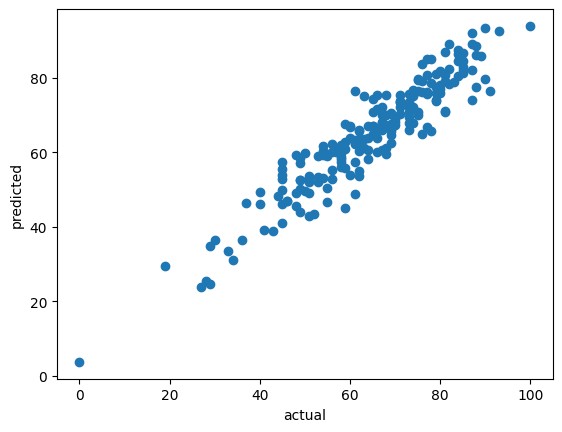

In [29]:
## plot y_pred and y_test
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')

<Axes: xlabel='math_score'>

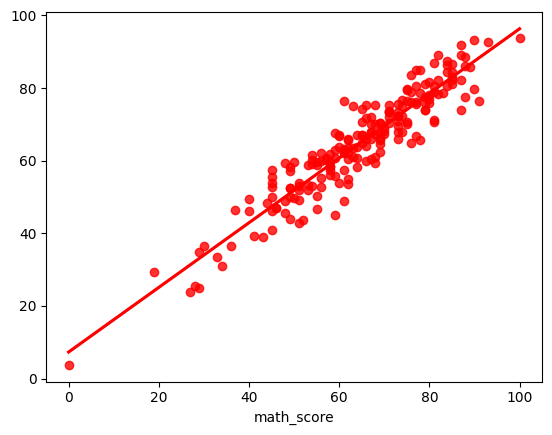

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

difference between actual and predicted values

In [31]:
pred_df=pd.DataFrame({'Actual value':y_test,'predicted value':y_pred,'difference':y_test-y_pred})

In [32]:
pred_df

,Actual value,predicted value,difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
